
#                基于前程无忧数据的互联网就业分析


### 作者：木烨


## 三. 数据分析


#### 分析步骤的文字说明（整体思路以及预期等）

数据分析部分主要进行较简单的运算与可视化，得出一些较为直观的结论


1.探究不同城市对互联网职业的需求量

从下面柱状图可以看出，上海、深圳、广州是对互联网职业需求最大的城市，相比而言，而哈尔滨的需求只有这三个城市的1/20.

   
大的城市，确实有更大的机遇


上海     23242
深圳     19539
广州     13808
北京     11725
武汉      7315
杭州      6893
成都      6130
西安      3534
重庆      2347
哈尔滨      813
Name: city, dtype: int64


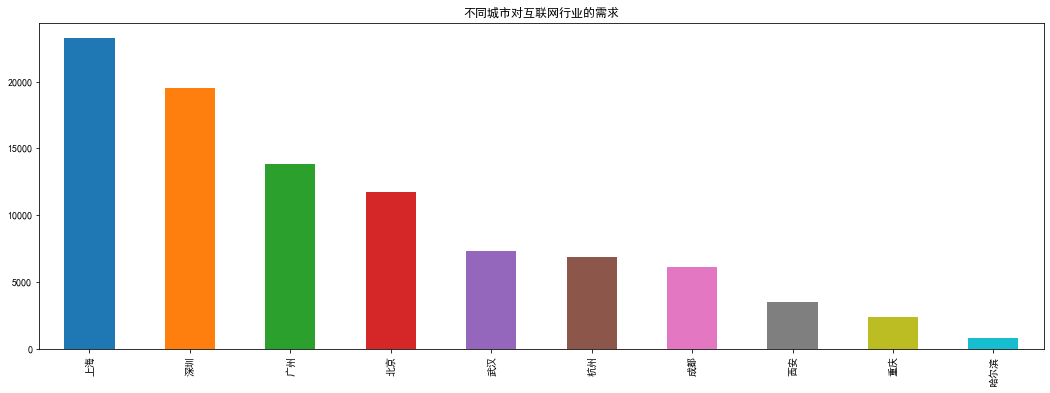

In [10]:
print(data['city'].value_counts())
data['city'].value_counts().plot(kind='bar',figsize=[18,6],title="不同城市对互联网行业的需求")

2.探究就业对学历的要求

可以看出，明确要求博士学位的很少很少，明确要求硕士学位的也只有3%左右，本科毕业便可以跨进大多数职业。

而大专以下，初中、中技、中专在互联网职业就业较艰难。

本科       56574
大专       24609
硕士        4116
中专         441
博士         278
高中         244
中技          85
初中及以下       37
Name: education, dtype: int64


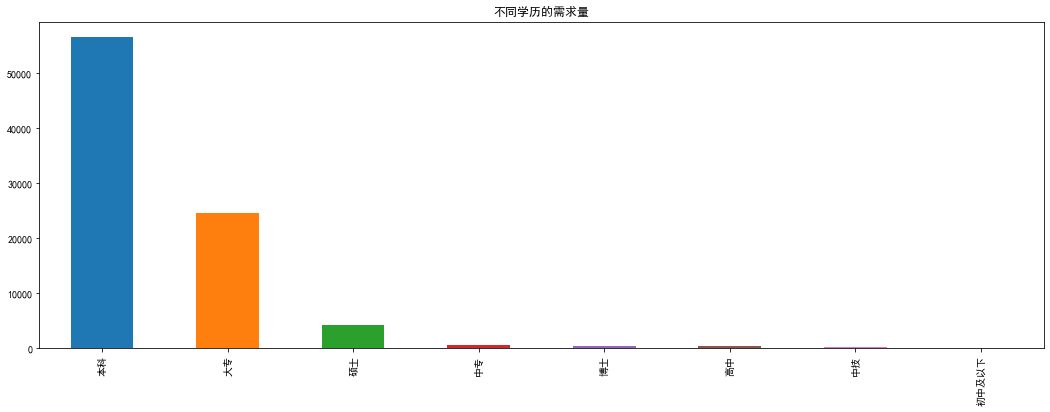

In [11]:
print(data['education'].value_counts())
data['education'].value_counts().plot(kind='bar',figsize=[18,6],title='不同学历的需求量')

In [184]:
beijing=data[data['city']=='北京']
shanghai=data[data['city']=='上海']
guangzhou=data[data['city']=='广州']
shenzhen=data[data['city']=='深圳']
haerbing=data[data['city']=='哈尔滨']
wuhan=data[data['city']=='武汉']
xian=data[data['city']=='西安']
hangzhou=data[data['city']=='杭州']
chengdu=data[data['city']=='成都']
chongqin=data[data['city']=='重庆']



### 3.探究不同城市的就业薪酬
北京就业平均薪酬最高，其次是上海、深圳、杭州、广州。


哈尔滨就业薪酬明显低于其它城市。


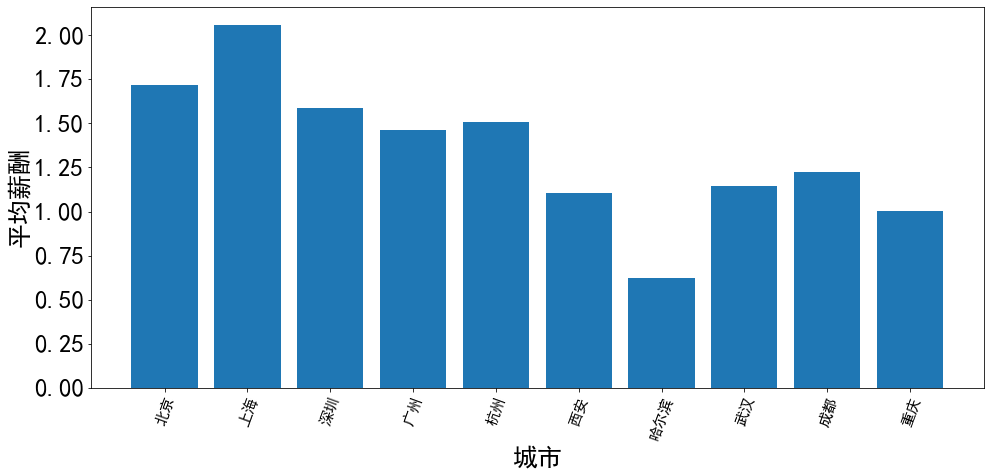

In [13]:
citylist=['北京','上海','深圳','广州','杭州','西安','哈尔滨','武汉','成都','重庆']
educationlist=['博士','硕士','本科','大专','高中','中技','中专','初中及以下']

meansalary=[]
for k in range(0,len(citylist)):
    meansalary.append(data[data['city']==citylist[k]].money.mean())
fig=plt.figure(figsize=(16,7))           
plt.bar(citylist,meansalary)
plt.xlabel("城市",fontsize=25)
plt.xticks(rotation=70,fontsize=15)
plt.ylabel("平均薪酬",fontsize=25)
plt.yticks(fontsize=25)
plt.show()

## 4.探究薪酬和教育的关系
博士薪酬明显高于其它


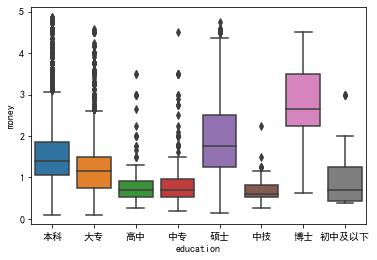

In [14]:
# body-style
data5=data[data['money']<5]
import seaborn as sns
sns.boxplot(x="education", y="money", data=data5)

# 5.工作经验与薪酬
可以看出，抛开经验为0的数据，其余基本呈线性分布

经验为0的一般为大学应届毕业生，故并不遵循这一规律

E:\Anaconda\MyAnaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


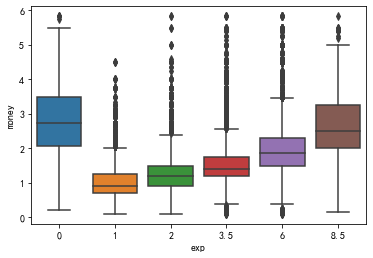

In [15]:
# body-style
data5=data[data['exp']!='无']
data5=data5[data['money']<6]
import seaborn as sns
sns.boxplot(x="exp", y="money", data=data5)

# 6.使用词云图观察公司福利

In [7]:
text0=data.text             ##将所有福利文本进行提取
#duty0=data.duty
for i in range(0,text0.shape[0]):
    progress = int(i*100/text0.shape[0])
    progerss_str = ('#'*progress)+"({}%/100%)".format(progress)
    print("\r完成进度:{:<120}".format(progerss_str),end="")      ##输出进度
    funtext=''.join(i for i in text0)
    #dutytext=''.join(i for i in duty0)
    #with open("funtext.txt" , "a" , encoding="utf-8") as fp1:
    #   fp1.write(funtext)   

完成进度:###################################################################################################(99%/100%)           

In [17]:
funtext=re.sub(re.compile('， |；|\.|、|。'),'',funtext)#去掉符号
wordlist1=" ".join(jieba.cut(funtext,cut_all=True))
stopwords = ['年终','专业','绩效','培训']
wc = wordcloud.WordCloud(
              font_path="C:\\Windows\\Fonts\\STFANGSO.ttf",
              background_color="white",  # 背景颜色
              max_words=200,  # 词云显示的最大词数
              stopwords = stopwords,        # 设置停用词
              max_font_size=200,  # 字体最大值
              random_state=42,#设置有多少种随机生成状态，即有多少种配色
              width=1000, height=1000, margin=2,# 设置图片默认的大小,margin为词语边缘距离
              ).generate(wordlist1)

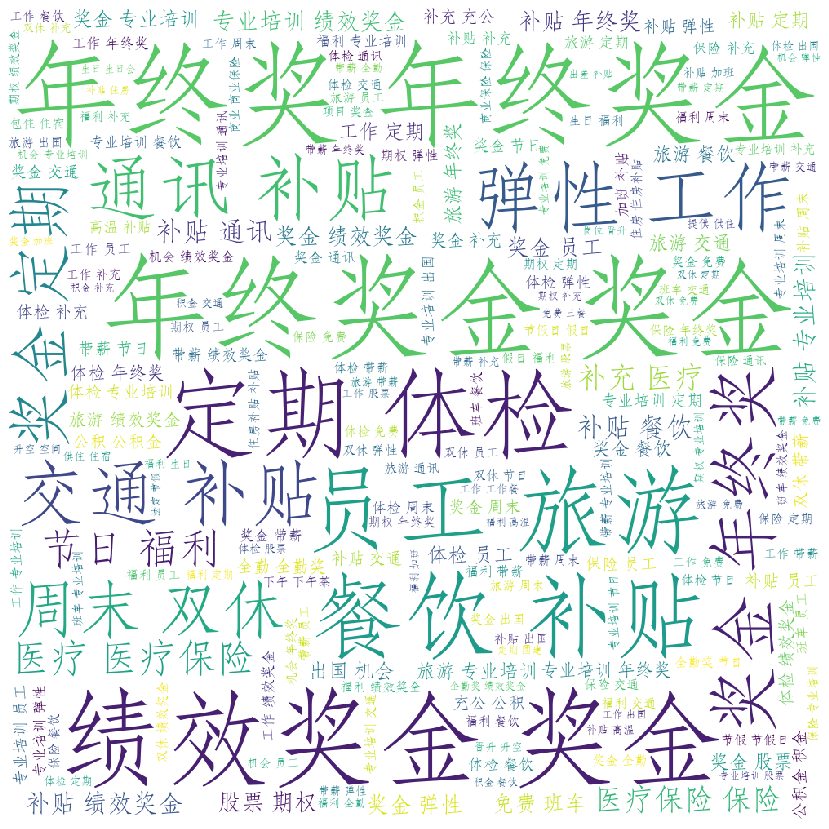

In [18]:
fig=plt.figure(figsize=(15,15))  
plt.imshow(wc)
plt.axis("off")
plt.show()


# 7.不同语言的要求数量

java是最热门语言 

[10261, 25120, 5241, 6386, 4945, 2639, 956, 437, 411, 642, 156, 182, 253, 319, 110, 59, 7, 4, 21535]


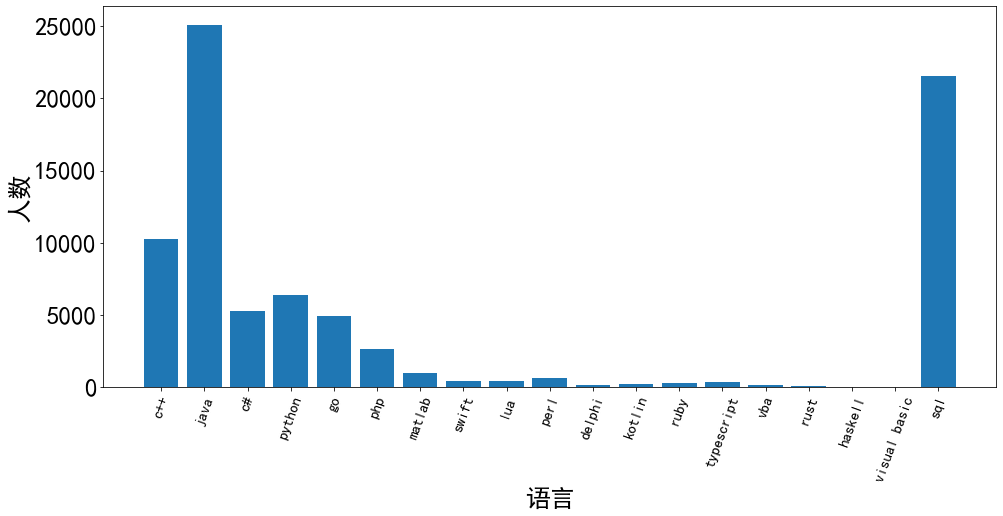

In [148]:
alln=[]
mean=[]
for i in range(0,19):
    test=data2[data2[language[i]]==1]
    mean.append(test.money.mean())
    alln.append(test[language[i]].count())
fig=plt.figure(figsize=(16,7))
print(alln)
plt.bar(language,alln)
plt.xlabel("语言",fontsize=25)
plt.xticks(rotation=70,fontsize=15)
plt.ylabel("人数",fontsize=25)
plt.yticks(fontsize=25)
plt.show()

# 8.不同语言的平均薪酬

19种语言平均薪酬相近，语言在于其次，关键在于语言的掌握程度。

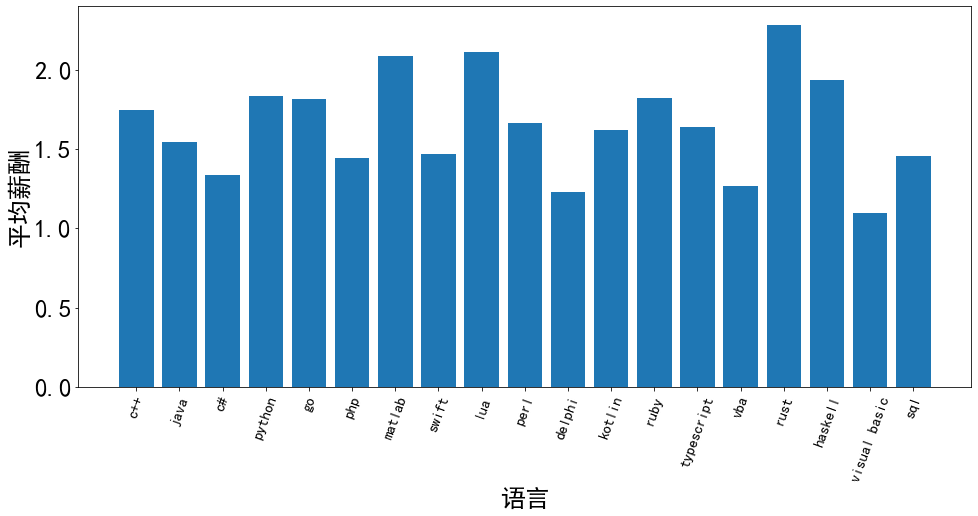

In [151]:
fig=plt.figure(figsize=(16,7))           
plt.bar(language,mean)
plt.xlabel("语言",fontsize=25)
plt.xticks(rotation=70,fontsize=15)
plt.ylabel("平均薪酬",fontsize=25)
plt.yticks(fontsize=25)
plt.show()


## 四 .结果展示

首先仅提取薪酬、教育、经验、城市、编程语言这几项

并将学历、城市用数字替换

In [16]:
data2=pd.read_csv('data2.csv',index_col= 0, header= 0)
data2 = data2.drop('job', axis=1)
data2=data2.drop('company',axis=1)
data2 = data2.drop('text', axis=1)
data2=data2.drop('key',axis=1)
data2=data2.drop('duty',axis=1)
data2 = data2.drop('num', axis=1)
citylist=['北京','上海','深圳','广州','杭州','西安','哈尔滨','武汉','成都','重庆']
educationlist=['博士','硕士','本科','大专','高中','中技','中专','初中及以下']
for i in range(0,10):
    data2["city"].replace(citylist[i], i, inplace = True)
for i in range(0,8):
    data2['education'].replace(educationlist[i],i,inplace=True)
data2=data2[data2['exp']!='无']
data2['exp']=data2['exp'].astype("float")
data2=data2[data2['exp']>0]

tmp= data2['money']
data2.drop(labels=['money'], axis=1,inplace = True)
data2.insert(0, 'money', tmp)
tmp1= data2['sum']
data2.drop(labels=['sum'], axis=1,inplace = True)
data2.insert(4, 'sum', tmp1)

data2

,money,education,exp,city,sum,c++,java,c#,python,go,...,perl,delphi,kotlin,ruby,typescript,vba,rust,haskell,visual basic,sql
1,1.20,2,3.5,2,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.10,3,3.5,2,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.50,2,2.0,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.25,3,3.5,3,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0.90,2,2.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.60,2,2.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,1.10,3,2.0,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,3.50,2,8.5,2,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13,1.65,2,3.5,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,1.05,3,3.5,3,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
x = data2.as_matrix()[:,1:]
y = data2.as_matrix()[:,0].reshape(-1,1)
print(x)
 
#数据分割，随机采样25%作为测试样本，其余作为训练样本
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=40, test_size=0.25)

#数据标准化处理
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
ss_y = StandardScaler()
x_train = ss_x.fit_transform(x_train)
x_test = ss_x.transform(x_test)
y_train = ss_y.fit_transform(y_train)
y_test = ss_y.transform(y_test)

E:\Anaconda\MyAnaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
E:\Anaconda\MyAnaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


[[2.  3.5 2.  ... 0.  0.  0. ]
 [3.  3.5 2.  ... 0.  0.  0. ]
 [2.  2.  2.  ... 0.  0.  0. ]
 ...
 [2.  2.  9.  ... 0.  0.  0. ]
 [3.  2.  7.  ... 0.  0.  0. ]
 [2.  3.5 7.  ... 0.  0.  1. ]]



# 1.预测薪酬 

#这一部分尝试利用输入，预测薪酬。

都是采用75%数据输入，25%的数据作检测


首先尝试，将所有数据输入进去，即用教育、经验、语言、城市预测薪酬，可以看出下面输出的模型并不好，SVM

输出R平方仅为0.206的。

之后尝试，仅输入教育学历用随机森林模型来预测，R方0.396,弱相关。

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

#使用SVM模型预测
svr = SVR()
svr.fit(x_train, y_train) 
svr_y_predict = svr.predict(x_test)
print("SVM R方：", r2_score(y_test, svr_y_predict))

E:\Anaconda\MyAnaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM R方： 0.2060837483561716


In [26]:
x = data2.as_matrix()[:,1:2]
y = data2.as_matrix()[:,0].reshape(-1,1) 
#数据分割，随机采样25%作为测试样本，其余作为训练样本
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=40, test_size=0.25)

#数据标准化处理
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
ss_y = StandardScaler()
x_train = ss_x.fit_transform(x_train)
x_test = ss_x.transform(x_test)
y_train = ss_y.fit_transform(y_train)
y_test = ss_y.transform(y_test)



E:\Anaconda\MyAnaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
E:\Anaconda\MyAnaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [33]:

#使用随机森林模型预测
rf = RandomForestRegressor()
rf.fit(x_train, y_train) 
rf_y_predict = rf.predict(x_test)
print("随机森林 R方：", r2_score(y_test, rf_y_predict))

随机森林 R方： 0.039656532688287394


E:\Anaconda\MyAnaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\Anaconda\MyAnaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


# 2.语言聚类
 

将数据集缩减至仅剩语言

In [34]:
data3=data2[data2['sum']>1]
data3 = data3.drop('education', axis=1)
data3=data3.drop('money',axis=1)
data3 = data3.drop('city', axis=1)
data3=data3.drop('exp',axis=1)
data3=data3.drop('sum',axis=1)

In [55]:
data3.to_csv('data3.csv',index=1,encoding='utf-8-sig',mode='a',header='True')
data3

,c++,java,c#,python,go,php,matlab,swift,lua,perl,delphi,kotlin,ruby,typescript,vba,rust,haskell,visual basic,sql
4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
14,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
20,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
21,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
25,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
35,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


尝试直接使用Kmeans算法，分类。

但通过不断调节参数K发现，将19种语言粗暴的分为几类效果并不好，输出轮廓系数都不太好。

In [35]:
 from sklearn.cluster import KMeans
    
language=['c++','java','c#','python','go','php','matlab','swift','lua',
          'perl','delphi','kotlin','ruby','typescript','vba','rust','haskell','visual basic'
         ,'sql']
x=data3
from sklearn.model_selection import train_test_split
x_train, x_test, = train_test_split(x,random_state=40, test_size=0.25)
kmeanspredicter=KMeans(n_clusters=6).fit(x_train)
category=kmeanspredicter.predict(x_train)
print(category)

[3 1 1 ... 4 0 1]


In [59]:
x=data3
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score,davies_bouldin_score # 计算 轮廓系数，CH 指标，DBI 
x_train, x_test, = train_test_split(x,random_state=40, test_size=0.25)
for j in range(5,16):
    kmeanspredicter=KMeans(n_clusters=j).fit(x)
    category=kmeanspredicter.predict(x)
    score=silhouette_score(x,category)
    print('best_score:%.d, k:%3f'%(j,score))


best_score:5, k:0.391366
best_score:6, k:0.434414
best_score:7, k:0.447832
best_score:8, k:0.470250
best_score:9, k:0.507443
best_score:10, k:0.512331
best_score:11, k:0.556253
best_score:12, k:0.568294
best_score:13, k:0.574684
best_score:14, k:0.592987
best_score:15, k:0.613146


尝试Birch算法，输出轮廓系数为0.95，将语言分为60种组合

在就业时，可以根据你的现有语言，在些组合中确定下一步要学习的语言。

In [111]:
x=data3
from sklearn.cluster import Birch
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import silhouette_score,davies_bouldin_score # 计算 轮廓系数，CH 指标，DBI 
y_pred= Birch(n_clusters = None,compute_labels=True).fit_predict(x)
score=silhouette_score(x,y_pred)
print('best_score:%.3f'%(score))
category

best_score:0.905


In [128]:
num=[]
for i in y_pred:
    if y_pred[i] not in num:
        num.append(y_pred[i])
for i in range(0,len(num)):
    for k in y_pred:
        if y_pred[k]==num[i]:
            print('class:%.d   '%(i),end='')
            for n in range(0,19):
                if(data3.iloc[k,n]==1):
                    print(language[n],end='   ')
            print("")
            break

class:0   php   sql   
class:1   java   python   
class:2   c++   java   
class:3   python   sql   
class:4   java   go   sql   
class:5   c++   python   
class:6   java   php   sql   
class:7   c++   java   python   
class:8   python   go   sql   
class:9   java   go   php   sql   
class:10   c#   sql   
class:11   c++   java   python   go   sql   
class:12   c++   c#   
class:13   c++   lua   
class:14   java   swift   
class:15   c++   c#   python   go   
class:16   java   python   go   
class:17   java   c#   sql   
class:18   c++   java   go   php   sql   
class:19   c++   sql   
class:20   java   python   go   php   sql   
class:21   python   lua   
class:22   python   go   perl   sql   
class:23   c++   python   matlab   
class:24   java   python   php   
class:25   c++   matlab   
class:26   java   c#   
class:27   java   php   
class:28   c++   python   lua   
class:29   java   python   sql   
class:30   c++   c#   php   sql   
class:31   go   php   sql   
class:32   c++   jav


#### 结果分析

总体来说，基本达到预期目标

1.完成对前程无忧网站的爬取，获取足够数量的数据集，并进行数据清洗

2.使用8张可视化图反应一些现实问题

3.尝试根据参数预测薪酬并不成功，薪酬并不简单的是几个招聘因素所能决定，并且实际就业薪酬与招聘时书写的

薪酬范围可能不同，例如部分高薪职位虽然无学历要求，实际录取竞争时往往选择硕士以上学位。

4.对19种语言进行聚类，提供一种根据现在掌握的一或两种语言，判断学习哪一语言有利于就业


by 木烨



2019.12.24